In [ ]:
#!wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
#!chmod +x Miniconda3-latest-Linux-x86_64.sh
#!time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local

! wget -c https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.3-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.3-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.3-Linux-x86_64.sh -b -f -p /usr/local

! conda install -q -y -c conda-forge rdkit

! python -m pip install "git+https://github.com/javadba/mpld3@display_fix"

In [2]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D

import matplotlib.pyplot as plt
import mpld3
from mpld3 import plugins
mpld3.enable_notebook()

In [3]:
def moltosvg(mol,molSize=(225,75),kekulize=True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')

In [4]:
smiles_list = ['CC','CCC','CCCC','O=C(C)Oc1ccccc1C(=O)O','c1ccccc1c1ccccc1']
mols = [Chem.MolFromSmiles(smiles) for smiles in smiles_list]

data = range(len(mols))

svgs = [moltosvg(m) for m in mols]

C:\ProgramData\Anaconda3\envs\rdkit\lib\site-packages\mpld3\mplexporter\exporter.py:267: MatplotlibDeprecationWarning: 
The get_offset_position function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  offset_order = offset_dict[collection.get_offset_position()]


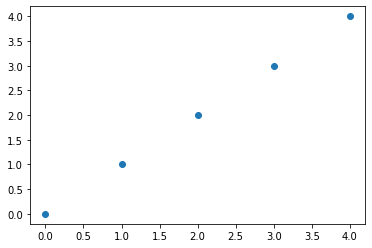

In [5]:
fig, ax = plt.subplots()
points = ax.scatter(data, data)
tooltip = plugins.PointHTMLTooltip(points, svgs)
plugins.connect(fig, tooltip)

In [ ]:
count = len(Y_train)
d = data[:count]
svgs = [ moltosvg(m) for m in d['Molecule'] ]

fig, ax = plt.subplots()
points = ax.scatter( x=Y_train, y=Y_train_pred, c="#7CAE00", alpha=0.3 )
tooltip = plugins.PointHTMLTooltip( points, svgs )
plugins.connect( fig, tooltip )
#ax.scatter( x=Y_test, y=Y_test_pred, c="#F8766D", alpha=0.3 )
#ax.xlabel( 'Experimental LogS' )
#ax.ylabel( 'Predicted LogS' )

plt.show()